In [1]:
import env
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
zillow = wrangle.get_zillow()

this file exists, reading from csv


In [3]:
zillow = wrangle.prep_zillow(zillow)

In [4]:
train,validate,test = wrangle.split_zillow(zillow)

In [5]:
sample = train.sample(1000)

<div class="alert alert-block alert-success">
    
# EXPLORATION
</div>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import explore

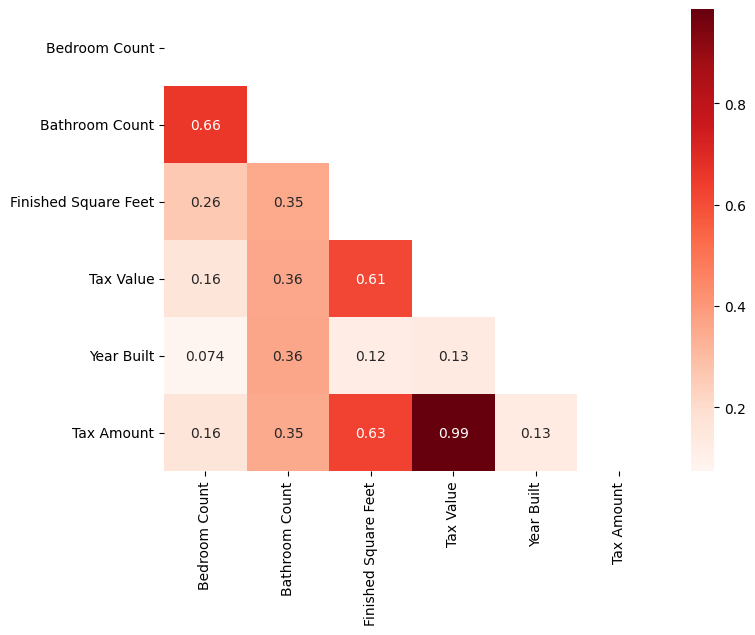

In [7]:
explore.heat_map(df=train)

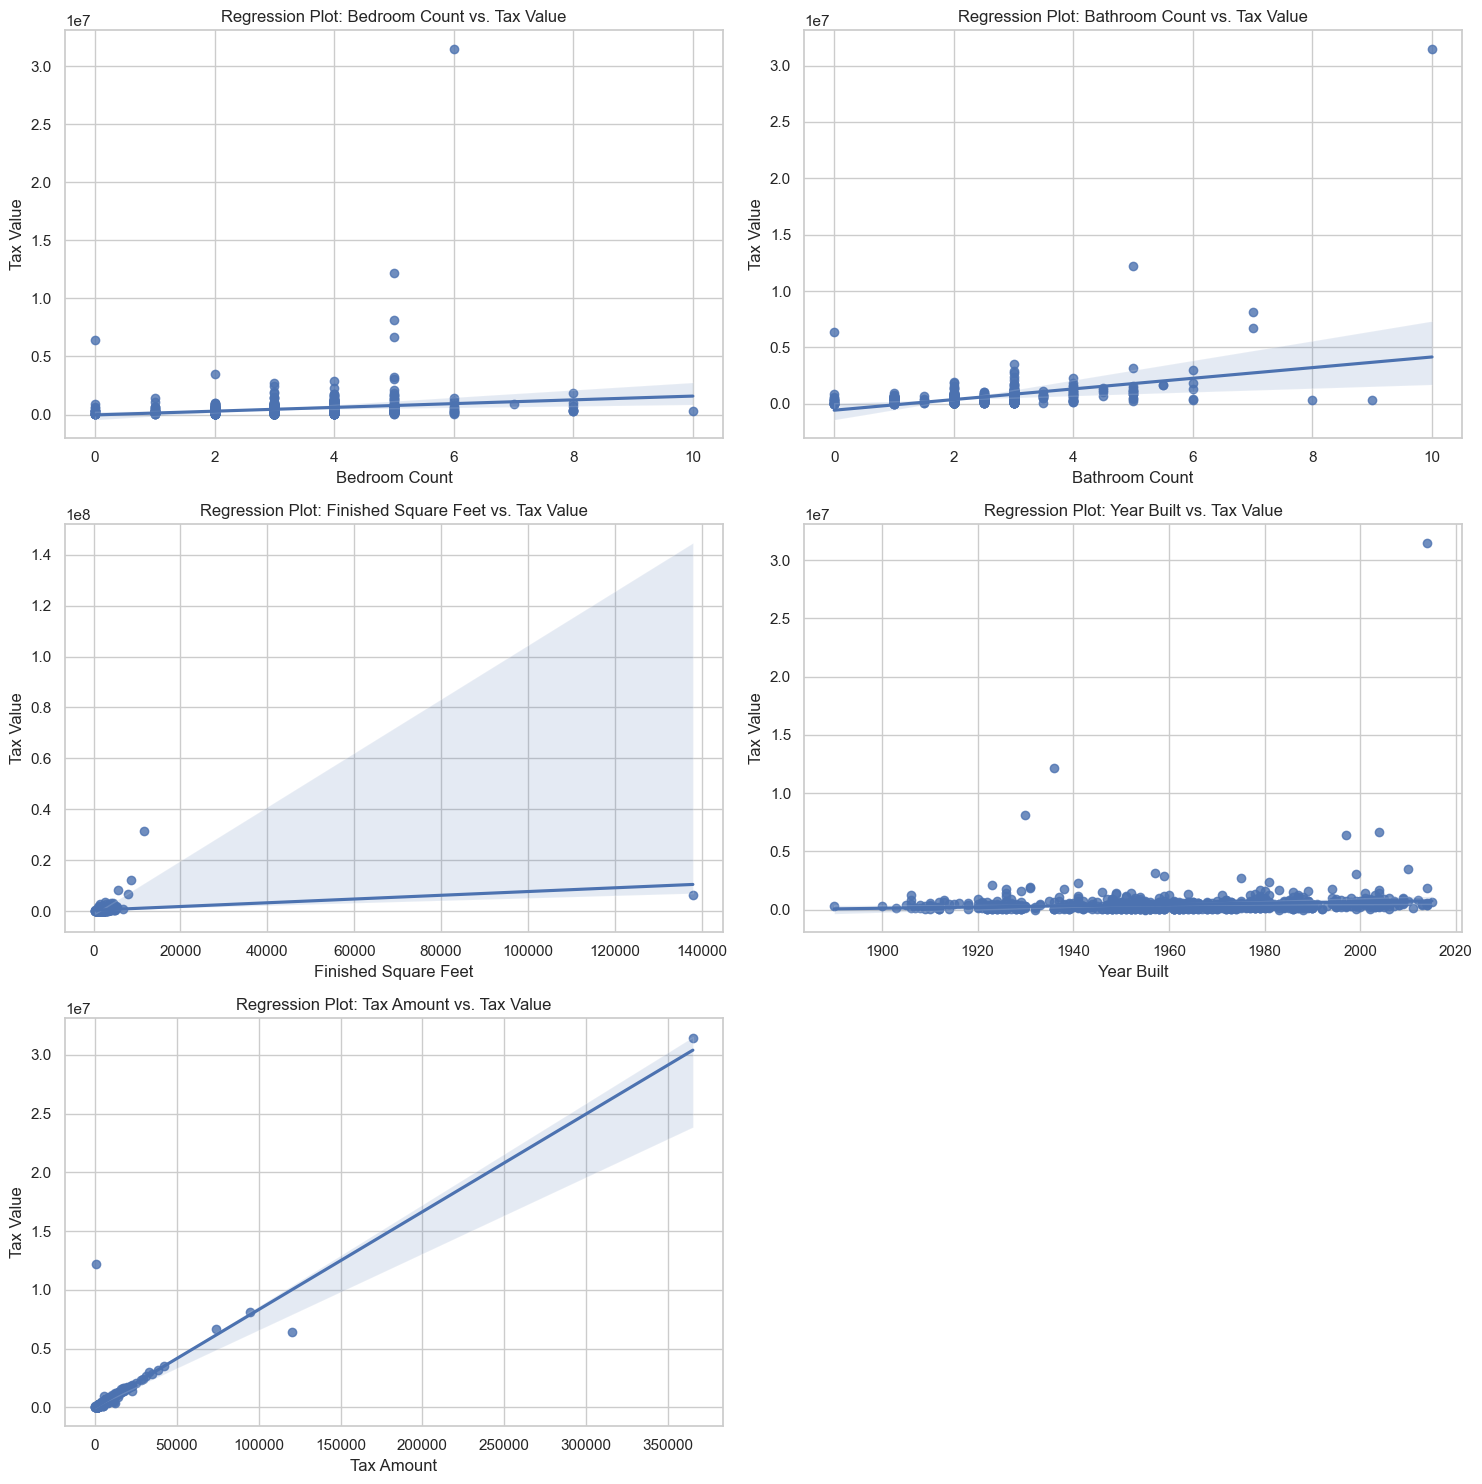

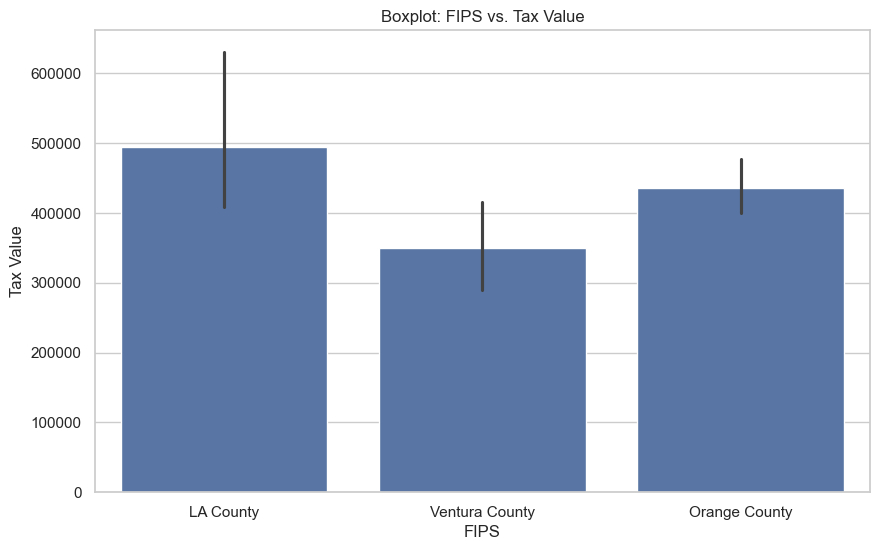

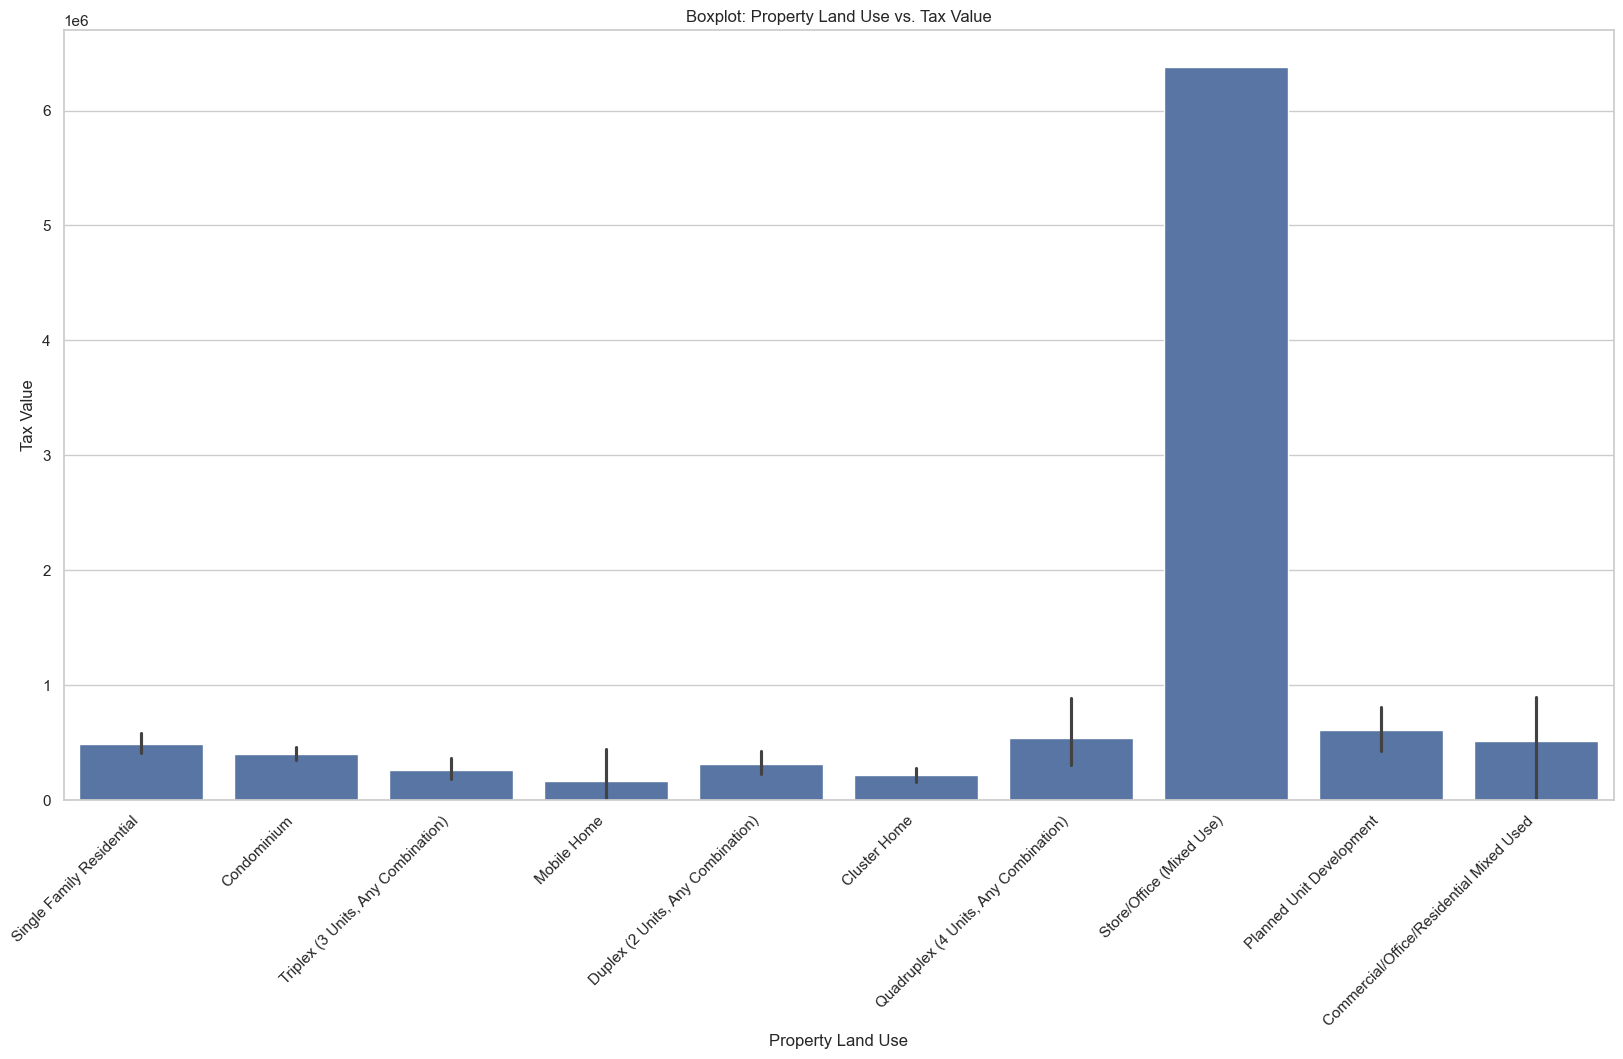

In [8]:
explore.plot_variable_pairs(df=sample)

<div class="alert alert-block alert-success">
    
# HYPOTHESIS TEST
</div>

<div class="alert alert-block alert-success">
    
## Tax Value vs. Continuous Variables
</div>

In [9]:
from scipy.stats import pearsonr, spearmanr
con_var = ['Bedroom Count', 'Bathroom Count', 'Finished Square Feet', 'Tax Value', 'Year Built', 'Tax Amount']
for variable in con_var:
    r,p = pearsonr(train[variable], train['Tax Value'])
    print(f'Pearson correlation coefficient for {variable}: {r:.4f}, p-value: {p:.4f}')


Pearson correlation coefficient for Bedroom Count: 0.1598, p-value: 0.0000
Pearson correlation coefficient for Bathroom Count: 0.3559, p-value: 0.0000
Pearson correlation coefficient for Finished Square Feet: 0.6140, p-value: 0.0000
Pearson correlation coefficient for Tax Value: 1.0000, p-value: 0.0000
Pearson correlation coefficient for Year Built: 0.1314, p-value: 0.0000
Pearson correlation coefficient for Tax Amount: 0.9865, p-value: 0.0000


<div class="alert alert-block alert-success">
    
## Tax Value vs. Categorical Variables
> ## FIPS
</div>

In [11]:
train['FIPS'].value_counts()

FIPS
LA County         1182833
Orange County      430789
Ventura County     127528
Name: count, dtype: int64

In [18]:
la_value = train[train['FIPS'] == 'LA County']['Tax Value']
orange_value = train[train['FIPS'] == 'Orange County']['Tax Value']
ventura_value = train[train['FIPS'] == 'Ventura County']['Tax Value']

In [23]:
print(la_value.std())
print(orange_value.std())
print(ventura_value.std())

808159.5128745312
561405.2196176556
352323.12466094666


In [27]:
import scipy.stats as stats
Ho = 'population means of property values in LA,Orange County and Ventura County are all equal'
Ha = 'population means of property values in LA,Orange County and Ventura County are NOT all equal'
alpha = 0.05

f,p = stats.f_oneway(la_value,orange_value,ventura_value)
if p < alpha:
    print(f"p = {p},f={f},we reject the null hypothesis,population means of property values in LA,Orange County and Ventura County are NOT all equal ")
else:
    print(f"p={p},we fail to reject the null hypothesis")


p = 0.0,f=1383.8047423755456,we reject the null hypothesis,population means of property values in LA,Orange County and Ventura County are NOT all equal 



<div class="alert alert-block alert-success">
    
## Tax Value vs. Categorical Variables
> ## Property Land Use
</div>

In [29]:
train['Property Land Use'].value_counts()

Property Land Use
Single Family Residential                     1283901
Condominium                                    287929
Duplex (2 Units, Any Combination)               67464
Planned Unit Development                        35306
Quadruplex (4 Units, Any Combination)           23574
Triplex (3 Units, Any Combination)              23410
Cluster Home                                     5733
Commercial/Office/Residential Mixed Used         5454
Mobile Home                                      3345
Store/Office (Mixed Use)                         2463
Cooperative                                      1070
Residential General                               681
Manufactured, Modular, Prefabricated Homes        661
Townhouse                                         159
Name: count, dtype: int64

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the ANOVA model
formula = 'Q("Tax Value") ~ C(Q("Property Land Use"))'

# Create an OLS model
model = ols(formula, data=train).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                                 sum_sq         df            F  PR(>F)
C(Q("Property Land Use"))  1.484459e+16       13.0  2182.995575     0.0
Residual                   9.107618e+17  1741136.0          NaN     NaN


In [31]:
from scipy.stats import f_oneway

# Example data (replace 'count' with your actual Tax Value column)
single_family_residential = train[train['Property Land Use'] == 'Single Family Residential']['Tax Value']
condominium = train[train['Property Land Use'] == 'Condominium']['Tax Value']
duplex = train[train['Property Land Use'] == 'Duplex (2 Units, Any Combination)']['Tax Value']
planned_unit_development = train[train['Property Land Use'] == 'Planned Unit Development']['Tax Value']
quadruplex = train[train['Property Land Use'] == 'Quadruplex (4 Units, Any Combination)']['Tax Value']
triplex = train[train['Property Land Use'] == 'Triplex (3 Units, Any Combination)']['Tax Value']
cluster_home = train[train['Property Land Use'] == 'Cluster Home']['Tax Value']
commercial_mixed_use = train[train['Property Land Use'] == 'Commercial/Office/Residential Mixed Used']['Tax Value']
mobile_home = train[train['Property Land Use'] == 'Mobile Home']['Tax Value']
store_mixed_use = train[train['Property Land Use'] == 'Store/Office (Mixed Use)']['Tax Value']
cooperative = train[train['Property Land Use'] == 'Cooperative']['Tax Value']
residential_general = train[train['Property Land Use'] == 'Residential General']['Tax Value']
manufactured_homes = train[train['Property Land Use'] == 'Manufactured, Modular, Prefabricated Homes']['Tax Value']
townhouse = train[train['Property Land Use'] == 'Townhouse']['Tax Value']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(
    single_family_residential, condominium, duplex, planned_unit_development, quadruplex,
    triplex, cluster_home, commercial_mixed_use, mobile_home, store_mixed_use, cooperative,
    residential_general, manufactured_homes, townhouse
)

# Output results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The one-way ANOVA test indicates significant differences between groups.')
else:
    print('The one-way ANOVA test does not indicate significant differences between groups.')


F-statistic: 2182.995574585796
P-value: 0.0
The one-way ANOVA test indicates significant differences between groups.
